Data Preparation

In [1]:
import pandas as pd

import os
 
# Base input path

base_path = '/kaggle/input'
 
# File names to import

file_names = ['Datasets.csv', 'Forums.csv', 'ForumTopics.csv']
 
# Create a dictionary to hold DataFrames

dataframes = {}
 
# Walk through the input directory

for dirname, _, filenames in os.walk(base_path):

    for file in file_names:

        if file in filenames:

            file_path = os.path.join(dirname, file)

            dataframes[file.split('.')[0]] = pd.read_csv(file_path)

            print(f'Loaded {file} into DataFrame.')
 
# Access individual DataFrames

datasets_df = dataframes['Datasets']

forums_df = dataframes['Forums']

forum_topics_df = dataframes['ForumTopics']

/tmp/ipykernel_13/42381242.py:27: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[file.split('.')[0]] = pd.read_csv(file_path)


Loaded Datasets.csv into DataFrame.
Loaded Forums.csv into DataFrame.
Loaded ForumTopics.csv into DataFrame.


In [2]:
print("datasets_df Shape:",datasets_df.shape)
print("forums_df Shape:",forums_df.shape)
print("forum_topics_df Shape:",forum_topics_df.shape)

datasets_df Shape: (502835, 16)
forums_df Shape: (561356, 3)
forum_topics_df Shape: (459766, 13)


In [3]:
# Step 1: Group ForumTopics by forumId and count how many topics each forum has
forum_topic_counts = forum_topics_df.groupby('ForumId').size().reset_index(name='TotalForumTopics')
 
if 'TotalForumTopics' in datasets_df.columns:
    datasets_df = datasets_df.drop(columns=['TotalForumTopics'])
 
# Step 2: Merge this count into the datasets_df based on forumId
datasets_df = datasets_df.merge(forum_topic_counts, how='left', on='ForumId')
 
# Step 3: Fill NaN with 0 (for datasets with no forum topics)
datasets_df['TotalForumTopics'] = datasets_df['TotalForumTopics'].fillna(0).astype(int)
 
# Optional: Preview the result
datasets_df.head(15)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Id,CreatorUserId,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,Type,CreationDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels,Medal,MedalAwardDate,TotalForumTopics
0,26,553913,553913.0,NaN,793501.0,815299.0,1110,Dataset,03/08/2016 22:41:02,02/05/2018,89179,12252,293,144,1.0,08/02/2021,4
1,13,1132983,NaN,4.0,7651.0,7651.0,975,Dataset,12/18/2015 23:16:00,02/06/2018,252429,47348,405,452,1.0,08/05/2021,8
2,14,993,NaN,4.0,827864.0,850525.0,977,Dataset,12/21/2015 19:40:00,02/06/2018,531867,97979,903,496,1.0,06/29/2020,9
3,16,993,NaN,3.0,799881.0,821798.0,984,Dataset,12/28/2015 06:04:45,02/06/2018,112761,24939,142,209,2.0,11/06/2019,5
4,17,993,NaN,3.0,742210.0,762847.0,989,Dataset,01/07/2016 00:38:08,02/06/2018,775646,123897,1115,586,1.0,11/06/2019,13
5,18,500099,NaN,229.0,2157.0,2157.0,993,Dataset,01/08/2016 21:12:10,02/06/2018,1118138,226380,2354,1088,1.0,11/06/2019,17
6,19,1,NaN,7.0,420.0,420.0,997,Dataset,01/12/2016 00:33:31,02/06/2018,2546543,710620,4276,7422,1.0,11/06/2019,32
7,20,866896,NaN,373.0,4275.0,4275.0,999,Dataset,01/13/2016 02:01:43,02/06/2018,512668,78443,1249,546,1.0,11/06/2019,7
8,21,1,NaN,9.0,2159.0,2159.0,1015,Dataset,01/20/2016 16:32:33,02/05/2018,373813,34401,706,199,1.0,11/06/2019,13
9,22,508688,NaN,4.0,2152.0,2152.0,1016,Dataset,01/20/2016 22:51:48,01/17/2018,19279,1295,50,20,3.0,11/06/2019,0


In [4]:
# Info about columns, datatypes, and nulls
datasets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502835 entries, 0 to 502834
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Id                          502835 non-null  int64  
 1   CreatorUserId               502835 non-null  int64  
 2   OwnerUserId                 500269 non-null  float64
 3   OwnerOrganizationId         2566 non-null    float64
 4   CurrentDatasetVersionId     502601 non-null  float64
 5   CurrentDatasourceVersionId  502590 non-null  float64
 6   ForumId                     502835 non-null  int64  
 7   Type                        502835 non-null  object 
 8   CreationDate                502835 non-null  object 
 9   LastActivityDate            502835 non-null  object 
 10  TotalViews                  502835 non-null  int64  
 11  TotalDownloads              502835 non-null  int64  
 12  TotalVotes                  502835 non-null  int64  
 13  TotalKernels  

In [5]:
# Descriptive statistics (for all columns)
datasets_df.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Id,CreatorUserId,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,Type,CreationDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels,Medal,MedalAwardDate,TotalForumTopics
count,5.028350e+05,5.028350e+05,5.002690e+05,2566.000000,5.026010e+05,5.025900e+05,5.028350e+05,502835,502835,502835,5.028350e+05,502835.000000,502835.000000,502835.000000,31481.000000,29245,502835.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,501791,2839,NaN,NaN,NaN,NaN,NaN,1868,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dataset,09/26/2024 07:06:56,06/21/2024,NaN,NaN,NaN,NaN,NaN,11/06/2019,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,502835,5,5109,NaN,NaN,NaN,NaN,NaN,838,NaN
mean,3.856451e+06,1.092006e+07,1.096428e+07,1248.153546,6.439680e+06,6.593381e+06,3.989189e+06,NaN,NaN,NaN,1.953325e+03,257.439013,4.594477,1.681502,2.740637,NaN,0.057999
std,2.237230e+06,7.211851e+06,7.197016e+06,1271.215406,3.581519e+06,3.710126e+06,2.363486e+06,NaN,NaN,NaN,2.871914e+04,4372.257616,92.673740,34.887163,0.548687,NaN,1.160966
min,6.000000e+00,1.000000e+00,3.680000e+02,2.000000,5.800000e+01,5.800000e+01,7.620000e+02,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,1.000000,NaN,0.000000
25%,1.882166e+06,4.760409e+06,4.806855e+06,265.000000,3.129071e+06,3.178462e+06,1.905348e+06,NaN,NaN,NaN,4.400000e+01,3.000000,0.000000,0.000000,3.000000,NaN,0.000000
50%,3.815789e+06,1.006642e+07,1.012466e+07,959.000000,6.670576e+06,6.754937e+06,3.890297e+06,NaN,NaN,NaN,1.430000e+02,8.000000,0.000000,0.000000,3.000000,NaN,0.000000
75%,5.757276e+06,1.641131e+07,1.643883e+07,1606.000000,9.517212e+06,9.730474e+06,5.962111e+06,NaN,NaN,NaN,9.200000e+02,28.000000,1.000000,1.000000,3.000000,NaN,0.000000


In [6]:
# Check for missing values
datasets_df.isnull().sum()

Id                                 0
CreatorUserId                      0
OwnerUserId                     2566
OwnerOrganizationId           500269
CurrentDatasetVersionId          234
CurrentDatasourceVersionId       245
ForumId                            0
Type                               0
CreationDate                       0
LastActivityDate                   0
TotalViews                         0
TotalDownloads                     0
TotalVotes                         0
TotalKernels                       0
Medal                         471354
MedalAwardDate                473590
TotalForumTopics                   0
dtype: int64

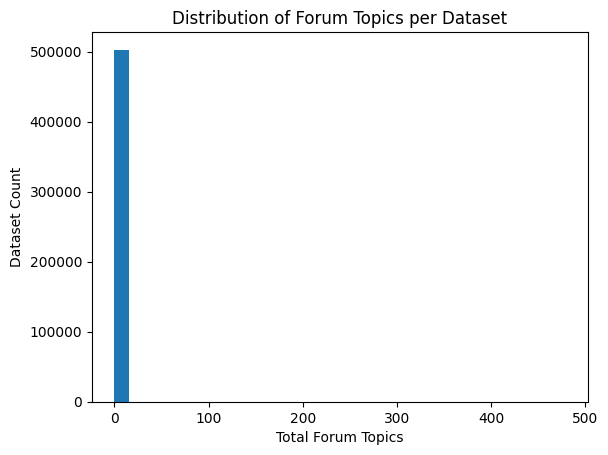

Datasets with the most forum topics:
           Id  TotalForumTopics
32786  661950               479
28897  551982               348
26168  494724               166
14          9               138
1474       63               117
Number of datasets with no forum topics: 488974


In [7]:
import matplotlib.pyplot as plt

plt.hist(datasets_df['TotalForumTopics'], bins=30)
plt.xlabel('Total Forum Topics')
plt.ylabel('Dataset Count')
plt.title('Distribution of Forum Topics per Dataset')
plt.show()

# Datasets with the most and least forum topics
print("Datasets with the most forum topics:")
print(datasets_df.sort_values('TotalForumTopics', ascending=False)[['Id','TotalForumTopics']].head())

print("Number of datasets with no forum topics:", (datasets_df['TotalForumTopics']==0).sum())


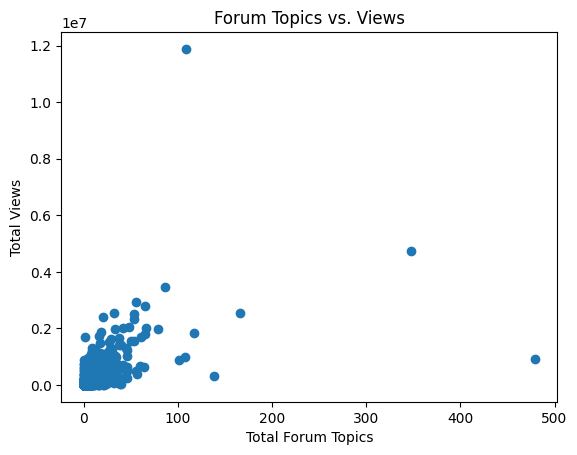

                  TotalForumTopics  TotalViews  TotalDownloads  TotalVotes  \
TotalForumTopics          1.000000    0.581146        0.511380    0.838420   
TotalViews                0.581146    1.000000        0.885893    0.564181   
TotalDownloads            0.511380    0.885893        1.000000    0.532053   
TotalVotes                0.838420    0.564181        0.532053    1.000000   
TotalKernels              0.362046    0.603938        0.654550    0.369224   

                  TotalKernels  
TotalForumTopics      0.362046  
TotalViews            0.603938  
TotalDownloads        0.654550  
TotalVotes            0.369224  
TotalKernels          1.000000  


In [8]:
# Scatter plot: forum topics vs. views
plt.scatter(datasets_df['TotalForumTopics'], datasets_df['TotalViews'])
plt.xlabel('Total Forum Topics')
plt.ylabel('Total Views')
plt.title('Forum Topics vs. Views')
plt.show()

# Correlation matrix
correlation = datasets_df[['TotalForumTopics', 'TotalViews', 'TotalDownloads', 'TotalVotes', 'TotalKernels']].corr()
print(correlation)

In [9]:
# Average forum topics by Medal type
print(datasets_df.groupby('Medal')['TotalForumTopics'].mean())

Medal
1.0    5.628571
2.0    0.995143
3.0    0.336023
Name: TotalForumTopics, dtype: float64


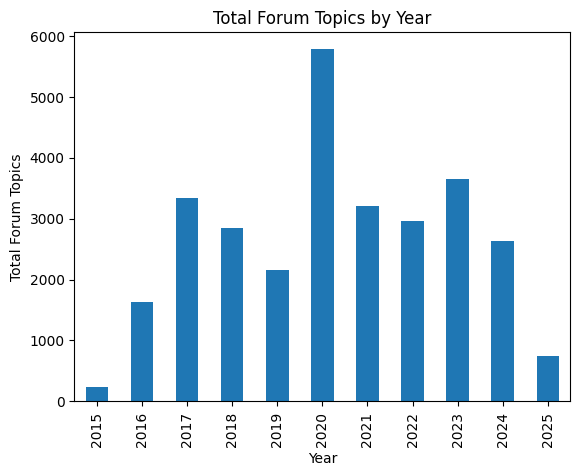

In [10]:
datasets_df['CreationDate'] = pd.to_datetime(datasets_df['CreationDate'], errors='coerce')
datasets_df['Year'] = datasets_df['CreationDate'].dt.year

# Total forum topics by year
yearly = datasets_df.groupby('Year')['TotalForumTopics'].sum()
yearly.plot(kind='bar')
plt.ylabel('Total Forum Topics')
plt.title('Total Forum Topics by Year')
plt.show()

In [11]:
# Average forum topics by Medal type
print(datasets_df.groupby('Medal')['TotalForumTopics'].mean())

Medal
1.0    5.628571
2.0    0.995143
3.0    0.336023
Name: TotalForumTopics, dtype: float64
